In [78]:
import cvxpy as cp
import matplotlib.pyplot as plt

In [79]:
from data import *

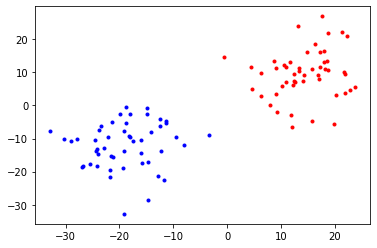

In [81]:
plt.plot(X[0,:], X[1,:], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
plt.show()

In [136]:
lambd = cp.Variable(shape=(100,))
M = np.concatenate((X, -Y), axis=1)
D = M.T @ M + np.eye(M.shape[1]) * 1e-5

In [84]:
print(D.shape)
print(M.shape)
print(np.all(np.linalg.eigvals(D) >= 0))
print(np.linalg.eigvals(D))

(100, 100)
(50, 100)
True
[4.65163889e+05+0.00000000e+00j 1.79169939e+04+0.00000000e+00j
 1.69909549e+04+0.00000000e+00j 1.57166879e+04+0.00000000e+00j
 1.43997251e+04+0.00000000e+00j 1.35757548e+04+0.00000000e+00j
 1.30565373e+04+0.00000000e+00j 1.19165148e+04+0.00000000e+00j
 1.13666783e+04+0.00000000e+00j 9.88722032e+03+0.00000000e+00j
 9.26269188e+03+0.00000000e+00j 8.80752462e+03+0.00000000e+00j
 8.45444283e+03+0.00000000e+00j 7.72338328e+03+0.00000000e+00j
 7.41493888e+03+0.00000000e+00j 7.12076940e+03+0.00000000e+00j
 6.69014491e+03+0.00000000e+00j 6.07341083e+03+0.00000000e+00j
 6.01646665e+03+0.00000000e+00j 4.87088920e+03+0.00000000e+00j
 4.30635469e+03+0.00000000e+00j 4.14601749e+03+0.00000000e+00j
 3.77978747e+03+0.00000000e+00j 3.61164935e+03+0.00000000e+00j
 3.47551210e+03+0.00000000e+00j 2.61349331e+03+0.00000000e+00j
 2.78817208e+03+0.00000000e+00j 2.85608407e+03+0.00000000e+00j
 2.37172532e+03+0.00000000e+00j 2.23614107e+03+0.00000000e+00j
 2.12842523e+03+0.00000000e+0

In [90]:
objective = cp.Minimize(-cp.sum(lambd) + 0.5*cp.quad_form(lambd, D))
constraints= [lambd >= 0, cp.sum(lambd[0:50] - lambd[50:100]) == 0]
problem = cp.Problem(objective, constraints)
problem.solve(solver=cp.ECOS, verbose=False)

-0.00014754728098678147

In [88]:
lambd.value

array([1.50064467e-10, 3.04040907e-10, 1.82406911e-09, 2.51610332e-10,
       1.37059668e-05, 2.82728690e-10, 2.17192559e-10, 1.33296981e-10,
       2.43113563e-10, 2.11673186e-10, 1.28304654e-10, 2.49939634e-10,
       3.16346256e-10, 2.45506239e-08, 2.81112258e-10, 3.84778099e-10,
       2.63543086e-10, 1.99916261e-10, 8.64236276e-10, 2.08060745e-10,
       2.60774016e-10, 4.63545789e-09, 2.49145159e-10, 3.09116103e-10,
       5.64276682e-10, 3.08456432e-10, 2.97348559e-10, 5.94206637e-05,
       2.93722818e-05, 1.18178357e-10, 2.37928883e-10, 1.99473251e-05,
       4.30885580e-10, 3.56629285e-10, 1.28831248e-10, 2.50314691e-05,
       6.85037160e-10, 7.88226003e-10, 6.34930263e-10, 2.96300605e-10,
       5.43822149e-10, 1.61594500e-10, 3.93230476e-10, 1.21472332e-09,
       1.42036127e-10, 2.45168104e-10, 3.26028406e-10, 2.24394045e-10,
       2.24160661e-10, 2.11245294e-10, 2.27821188e-10, 2.59217440e-10,
       2.03498479e-10, 1.05730817e-09, 6.51455758e-09, 1.63811216e-09,
      

In [96]:
w = np.sum(np.multiply(lambd.value,M), axis=1)

In [108]:
print(w.shape)
print(M[:, 23].shape)

(50, 1)
(50, 1)


In [105]:
index = np.argmax(lambd.value)

In [119]:
b = 1 - (w.T@M[:,index])[0,0]

In [120]:
b

0.023873674710900183

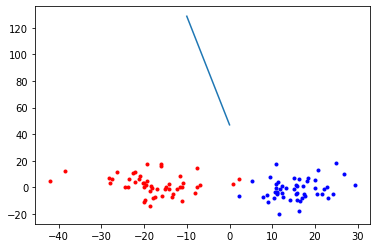

In [135]:
i1 = 20
i2 = 35
plt.plot(X[i1,:], X[i2,:], 'r.')
plt.plot(Y[i1,:], Y[i2,:], 'b.')
x = np.linspace(-10, 0, 100)
y = -(w[i1, 0]*x + b)/w[i2, 0]
plt.plot(x, y)
plt.show()